In [1]:
#Took from lesson 3.05-lesson-feature-engineering
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.dummy import DummyRegressor # high bias model
%matplotlib inline

In [205]:
home_test = pd.read_csv('datasets/test.csv')
home_test.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,4,2006,WD
1,2718,905108090,90,RL,NaN,9662,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,8,2006,WD
2,2414,528218130,60,RL,58.0,17104,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,9,2006,New
3,1989,902207150,30,RM,60.0,8520,Pave,NaN,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,7,2007,WD
4,625,535105100,20,RL,NaN,9500,Pave,NaN,IR1,Lvl,...,0,185,0,NaN,NaN,NaN,0,7,2009,WD


In [206]:
home_train = pd.read_csv('datasets/train.csv')
home_train.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [207]:
pd.set_option('display.max_rows', None)

In [208]:
home_train.isnull().sum()

Id                    0
PID                   0
MS SubClass           0
MS Zoning             0
Lot Frontage        330
Lot Area              0
Street                0
Alley              1911
Lot Shape             0
Land Contour          0
Utilities             0
Lot Config            0
Land Slope            0
Neighborhood          0
Condition 1           0
Condition 2           0
Bldg Type             0
House Style           0
Overall Qual          0
Overall Cond          0
Year Built            0
Year Remod/Add        0
Roof Style            0
Roof Matl             0
Exterior 1st          0
Exterior 2nd          0
Mas Vnr Type         22
Mas Vnr Area         22
Exter Qual            0
Exter Cond            0
Foundation            0
Bsmt Qual            55
Bsmt Cond            55
Bsmt Exposure        58
BsmtFin Type 1       55
BsmtFin SF 1          1
BsmtFin Type 2       56
BsmtFin SF 2          1
Bsmt Unf SF           1
Total Bsmt SF         1
Heating               0
Heating QC      

In [209]:
home_cols = [n for n in home_train.columns]
home_cols

['Id',
 'PID',
 'MS SubClass',
 'MS Zoning',
 'Lot Frontage',
 'Lot Area',
 'Street',
 'Alley',
 'Lot Shape',
 'Land Contour',
 'Utilities',
 'Lot Config',
 'Land Slope',
 'Neighborhood',
 'Condition 1',
 'Condition 2',
 'Bldg Type',
 'House Style',
 'Overall Qual',
 'Overall Cond',
 'Year Built',
 'Year Remod/Add',
 'Roof Style',
 'Roof Matl',
 'Exterior 1st',
 'Exterior 2nd',
 'Mas Vnr Type',
 'Mas Vnr Area',
 'Exter Qual',
 'Exter Cond',
 'Foundation',
 'Bsmt Qual',
 'Bsmt Cond',
 'Bsmt Exposure',
 'BsmtFin Type 1',
 'BsmtFin SF 1',
 'BsmtFin Type 2',
 'BsmtFin SF 2',
 'Bsmt Unf SF',
 'Total Bsmt SF',
 'Heating',
 'Heating QC',
 'Central Air',
 'Electrical',
 '1st Flr SF',
 '2nd Flr SF',
 'Low Qual Fin SF',
 'Gr Liv Area',
 'Bsmt Full Bath',
 'Bsmt Half Bath',
 'Full Bath',
 'Half Bath',
 'Bedroom AbvGr',
 'Kitchen AbvGr',
 'Kitchen Qual',
 'TotRms AbvGrd',
 'Functional',
 'Fireplaces',
 'Fireplace Qu',
 'Garage Type',
 'Garage Yr Blt',
 'Garage Finish',
 'Garage Cars',
 'Garage Are

In [210]:
#drop every column where null values are more than 50
c = 0
home_del = []
for i in home_train.isnull().sum():
    if i >= 50:
        home_del.append(home_cols[c])
    c += 1
home_del

['Lot Frontage',
 'Alley',
 'Bsmt Qual',
 'Bsmt Cond',
 'Bsmt Exposure',
 'BsmtFin Type 1',
 'BsmtFin Type 2',
 'Fireplace Qu',
 'Garage Type',
 'Garage Yr Blt',
 'Garage Finish',
 'Garage Qual',
 'Garage Cond',
 'Pool QC',
 'Fence',
 'Misc Feature']

In [211]:
home_test = home_test.drop(columns = home_del)
home_test.head()

,Id,PID,MS SubClass,MS Zoning,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type
0,2658,902301120,190,RM,9142,Pave,Reg,Lvl,AllPub,Inside,...,0,60,112,0,0,0,0,4,2006,WD
1,2718,905108090,90,RL,9662,Pave,IR1,Lvl,AllPub,Inside,...,170,0,0,0,0,0,0,8,2006,WD
2,2414,528218130,60,RL,17104,Pave,IR1,Lvl,AllPub,Inside,...,100,24,0,0,0,0,0,9,2006,New
3,1989,902207150,30,RM,8520,Pave,Reg,Lvl,AllPub,Inside,...,0,0,184,0,0,0,0,7,2007,WD
4,625,535105100,20,RL,9500,Pave,IR1,Lvl,AllPub,Inside,...,0,76,0,0,185,0,0,7,2009,WD


In [212]:
home_train = home_train.drop(columns = home_del)
home_train.isnull().sum()

Id                  0
PID                 0
MS SubClass         0
MS Zoning           0
Lot Area            0
Street              0
Lot Shape           0
Land Contour        0
Utilities           0
Lot Config          0
Land Slope          0
Neighborhood        0
Condition 1         0
Condition 2         0
Bldg Type           0
House Style         0
Overall Qual        0
Overall Cond        0
Year Built          0
Year Remod/Add      0
Roof Style          0
Roof Matl           0
Exterior 1st        0
Exterior 2nd        0
Mas Vnr Type       22
Mas Vnr Area       22
Exter Qual          0
Exter Cond          0
Foundation          0
BsmtFin SF 1        1
BsmtFin SF 2        1
Bsmt Unf SF         1
Total Bsmt SF       1
Heating             0
Heating QC          0
Central Air         0
Electrical          0
1st Flr SF          0
2nd Flr SF          0
Low Qual Fin SF     0
Gr Liv Area         0
Bsmt Full Bath      2
Bsmt Half Bath      2
Full Bath           0
Half Bath           0
Bedroom Ab

In [213]:
home_test.isnull().sum()

Id                 0
PID                0
MS SubClass        0
MS Zoning          0
Lot Area           0
Street             0
Lot Shape          0
Land Contour       0
Utilities          0
Lot Config         0
Land Slope         0
Neighborhood       0
Condition 1        0
Condition 2        0
Bldg Type          0
House Style        0
Overall Qual       0
Overall Cond       0
Year Built         0
Year Remod/Add     0
Roof Style         0
Roof Matl          0
Exterior 1st       0
Exterior 2nd       0
Mas Vnr Type       1
Mas Vnr Area       1
Exter Qual         0
Exter Cond         0
Foundation         0
BsmtFin SF 1       0
BsmtFin SF 2       0
Bsmt Unf SF        0
Total Bsmt SF      0
Heating            0
Heating QC         0
Central Air        0
Electrical         1
1st Flr SF         0
2nd Flr SF         0
Low Qual Fin SF    0
Gr Liv Area        0
Bsmt Full Bath     0
Bsmt Half Bath     0
Full Bath          0
Half Bath          0
Bedroom AbvGr      0
Kitchen AbvGr      0
Kitchen Qual 

In [214]:
#Replace the NA
home_train.dropna(inplace=True)

In [215]:
#Looking at the data dictionary we can see that many of the files are duplicates (or at least far to similar). 
#Let's make a matrix of them
duplo = ['MS SubClass', 'Lot Shape', 'Lot Config', 'Land Slope', 'Condition 2', 'House Style', 'Overall Cond', 'Year Remod/Add', 'Exterior 2nd', 'Exter Cond', 'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Heating', 'Garage Cars']
home_train = home_train.drop(columns = duplo)
home_test = home_test.drop(columns = duplo)

In [216]:
#Central air is either Yes or No so let's make Yes 1 and No 0
home_train['Central Air'] = home_train['Central Air'].map(lambda ca: 1 if ca == "Y" else 0)
home_test['Central Air'] = home_test['Central Air'].map(lambda ca: 1 if ca == "Y" else 0)

In [217]:
#Let's look at the info
home_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2026 entries, 0 to 2050
Data columns (total 48 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               2026 non-null   int64  
 1   PID              2026 non-null   int64  
 2   MS Zoning        2026 non-null   object 
 3   Lot Area         2026 non-null   int64  
 4   Street           2026 non-null   object 
 5   Land Contour     2026 non-null   object 
 6   Utilities        2026 non-null   object 
 7   Neighborhood     2026 non-null   object 
 8   Condition 1      2026 non-null   object 
 9   Bldg Type        2026 non-null   object 
 10  Overall Qual     2026 non-null   int64  
 11  Year Built       2026 non-null   int64  
 12  Roof Style       2026 non-null   object 
 13  Roof Matl        2026 non-null   object 
 14  Exterior 1st     2026 non-null   object 
 15  Mas Vnr Type     2026 non-null   object 
 16  Mas Vnr Area     2026 non-null   float64
 17  Exter Qual    

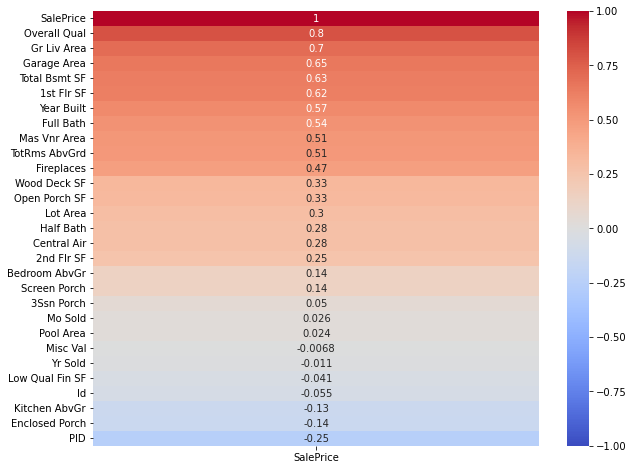

In [218]:
#Let's see the heat map without making dummies to see if we can reduce this further
#Based on Breakfast hour Thursday the 9th
plt.figure(figsize=(10,8))
sns.heatmap(home_train.corr()[['SalePrice']].sort_values(by='SalePrice',ascending=False),
            annot = True,
            vmin = -1,
            vmax = 1,
            cmap = 'coolwarm');

In [219]:
#Let's delete where the corrilation is less than 0.6
low_corr_array = ['Year Built', 'Full Bath', 'Mas Vnr Area', 'TotRms AbvGrd', 'Fireplaces', 'Wood Deck SF', 'Open Porch SF', 'Lot Area', 'Half Bath', 'Central Air', '2nd Flr SF', 'Bedroom AbvGr', 'Screen Porch', '3Ssn Porch', 'Mo Sold', 'Pool Area', 'Misc Val', 'Yr Sold', 'Low Qual Fin SF', 'Kitchen AbvGr', 'Enclosed Porch', 'PID']

In [220]:
home_train = home_train.drop(columns = low_corr_array)
home_test = home_test.drop(columns = low_corr_array)
home_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2026 entries, 0 to 2050
Data columns (total 26 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2026 non-null   int64  
 1   MS Zoning      2026 non-null   object 
 2   Street         2026 non-null   object 
 3   Land Contour   2026 non-null   object 
 4   Utilities      2026 non-null   object 
 5   Neighborhood   2026 non-null   object 
 6   Condition 1    2026 non-null   object 
 7   Bldg Type      2026 non-null   object 
 8   Overall Qual   2026 non-null   int64  
 9   Roof Style     2026 non-null   object 
 10  Roof Matl      2026 non-null   object 
 11  Exterior 1st   2026 non-null   object 
 12  Mas Vnr Type   2026 non-null   object 
 13  Exter Qual     2026 non-null   object 
 14  Foundation     2026 non-null   object 
 15  Total Bsmt SF  2026 non-null   float64
 16  Heating QC     2026 non-null   object 
 17  Electrical     2026 non-null   object 
 18  1st Flr 

In [221]:
#Let's Create Dummies and find out which ones are relevent or not
home_array = [n for n in home_test.drop(columns=['Id', 'Overall Qual', 'Total Bsmt SF', '1st Flr SF', 'Gr Liv Area', 'Garage Area'])]
home_array

['MS Zoning',
 'Street',
 'Land Contour',
 'Utilities',
 'Neighborhood',
 'Condition 1',
 'Bldg Type',
 'Roof Style',
 'Roof Matl',
 'Exterior 1st',
 'Mas Vnr Type',
 'Exter Qual',
 'Foundation',
 'Heating QC',
 'Electrical',
 'Kitchen Qual',
 'Functional',
 'Paved Drive',
 'Sale Type']

In [222]:
home_train = pd.get_dummies(home_train, columns=home_array, drop_first=True)
home_train.head()

,Id,Overall Qual,Total Bsmt SF,1st Flr SF,Gr Liv Area,Garage Area,SalePrice,MS Zoning_C (all),MS Zoning_FV,MS Zoning_I (all),...,Paved Drive_P,Paved Drive_Y,Sale Type_CWD,Sale Type_Con,Sale Type_ConLD,Sale Type_ConLI,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_WD
0,109,6,725.0,725,1479,475.0,130500,0,0,0,...,0,1,0,0,0,0,0,0,0,1
1,544,7,913.0,913,2122,559.0,220000,0,0,0,...,0,1,0,0,0,0,0,0,0,1
2,153,5,1057.0,1057,1057,246.0,109000,0,0,0,...,0,1,0,0,0,0,0,0,0,1
3,318,5,384.0,744,1444,400.0,174000,0,0,0,...,0,1,0,0,0,0,0,0,0,1
4,255,6,676.0,831,1445,484.0,138500,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [223]:
home_test = pd.get_dummies(home_test, columns=home_array, drop_first=False)
home_test.head()

,Id,Overall Qual,Total Bsmt SF,1st Flr SF,Gr Liv Area,Garage Area,MS Zoning_C (all),MS Zoning_FV,MS Zoning_I (all),MS Zoning_RH,...,Sale Type_COD,Sale Type_CWD,Sale Type_Con,Sale Type_ConLD,Sale Type_ConLI,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_VWD,Sale Type_WD
0,2658,6,1020,908,1928,440,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,2718,5,1967,1967,1967,580,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,2414,7,654,664,1496,426,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,1989,5,968,968,968,480,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,625,6,1394,1394,1394,514,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


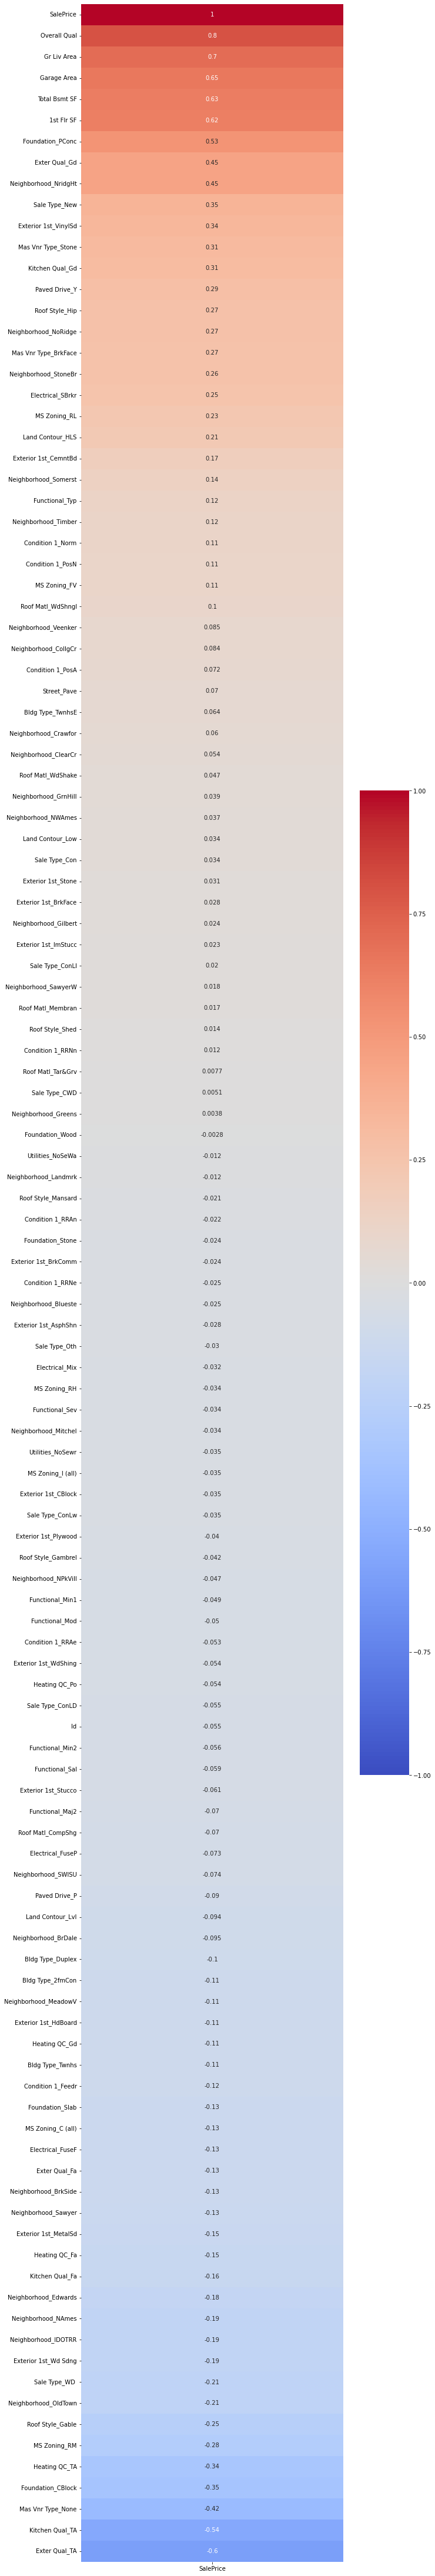

In [224]:
#look at the heat map again
plt.figure(figsize=(10,80))
sns.heatmap(home_train.corr()[['SalePrice']].sort_values(by='SalePrice',ascending=False),
            annot = True,
            vmin = -1,
            vmax = 1,
            cmap = 'coolwarm');

In [225]:
#The Only column that absolute value of this that makes the 0.6 threshold is Exter Qual_TA
xvars = ['Overall Qual', 'Gr Liv Area', 'Garage Area', 'Total Bsmt SF', '1st Flr SF', 'Exter Qual_TA']
X = home_train[xvars]
X.head()

,Overall Qual,Gr Liv Area,Garage Area,Total Bsmt SF,1st Flr SF,Exter Qual_TA
0,6,1479,475.0,725.0,725,0
1,7,2122,559.0,913.0,913,0
2,5,1057,246.0,1057.0,1057,1
3,5,1444,400.0,384.0,744,1
4,6,1445,484.0,676.0,831,1


In [226]:
y = home_train['SalePrice']
y.head()

0    130500
1    220000
2    109000
3    174000
4    138500
Name: SalePrice, dtype: int64

In [227]:
poly = PolynomialFeatures(include_bias = False, degree = 2)

In [228]:
X_poly = poly.fit_transform(X)

In [229]:
pd.DataFrame(X, columns = poly.get_feature_names(xvars)).head()

,Overall Qual,Gr Liv Area,Garage Area,Total Bsmt SF,1st Flr SF,Exter Qual_TA,Overall Qual^2,Overall Qual Gr Liv Area,Overall Qual Garage Area,Overall Qual Total Bsmt SF,...,Garage Area^2,Garage Area Total Bsmt SF,Garage Area 1st Flr SF,Garage Area Exter Qual_TA,Total Bsmt SF^2,Total Bsmt SF 1st Flr SF,Total Bsmt SF Exter Qual_TA,1st Flr SF^2,1st Flr SF Exter Qual_TA,Exter Qual_TA^2
0,6,1479,475.0,725.0,725,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,7,2122,559.0,913.0,913,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,5,1057,246.0,1057.0,1057,1,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5,1444,400.0,384.0,744,1,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,6,1445,484.0,676.0,831,1,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [230]:
poly = PolynomialFeatures(include_bias = False, degree=2)

In [231]:
home_test_poly = poly.fit_transform(home_test[xvars])

In [232]:
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, random_state=42)

In [233]:
lr = LinearRegression()

In [234]:
lr.fit(X_train, y_train)

LinearRegression()

In [235]:
prediction = lr.predict(home_test_poly)

In [236]:
home_test['SalePrice'] = prediction

In [237]:
print(f'Training R2: {lr.score(X_train, y_train)}')
print(f'Testing R2: {lr.score(X_test, y_test)}')

Training R2: 0.8589933055335499
Testing R2: 0.879607496219049


In [238]:
cross_val_score(lr, X_train, y_train, cv = 3).mean()

0.8219401785265875

In [239]:
lr_submission = home_test[['Id', 'SalePrice']]

In [240]:
lr_submission.head()

,Id,SalePrice
0,2658,196809.987067
1,2718,155217.865393
2,2414,164018.329643
3,1989,120833.763933
4,625,181679.021178


In [241]:
#lr_submission.to_csv('kaggle/6_14_submission_try1.csv')

In [242]:
#Let's try to improve with OSL. We first need a standard scaler we will call Z
#took from lesson 4.03
ss = StandardScaler()
Z_train = ss.fit_transform(X_train)
Z_test = ss.transform(X_test)

In [243]:
ols = LinearRegression()
ols.fit(Z_train, y_train)

LinearRegression()

In [244]:
print(f'Training Score: {ols.score(Z_train, y_train)}')
print(f'Testing Score: {ols.score(Z_test, y_test)}')

Training Score: 0.8589933055335499
Testing Score: 0.8796074962187521


In [245]:
#took from lesson 4.03
#seems like there is no change. But that's why we need the ridge
from sklearn.linear_model import Ridge
# Instantiate.
ridge = Ridge()
# Fit.
ridge.fit(Z_train, y_train)
# Evaluate model using R2.
print(f'Training score: {ridge.score(Z_train, y_train)}')
print(f'Test score: {ridge.score(Z_test, y_test)}')

Training score: 0.8581281624074523
Test score: 0.8814058035012804


In [246]:
#took from lesson 4.03
#We see some potential improvement. But let us increase the alpha on the ridge
# Instantiate.
ridge = Ridge(alpha=100)
# Fit.
ridge.fit(Z_train, y_train)
# Evaluate model using R2.
print(f'Training score: {ridge.score(Z_train, y_train)}')
print(f'Test score: {ridge.score(Z_test, y_test)}')

Training score: 0.8369045234885745
Test score: 0.8682739861573182


In [247]:
prediction = ridge.predict(home_test_poly)

In [248]:
home_test['SalePrice'] = prediction

In [249]:
lr_submission = home_test[['Id', 'SalePrice']]

In [250]:
#lr_submission.to_csv('kaggle/6_16_submission_try1.csv')

In [251]:
#this did not improve our score. But what about lasso?
from sklearn.linear_model import Lasso, LassoCV

In [252]:
#took from lesson 4.03
# Set up a list of Lasso alphas to check.
l_alphas = np.logspace(-3, 0, 100)
# Cross-validate over our list of Lasso alphas.
lasso_cv = LassoCV(alphas = l_alphas)
# Fit model using best ridge alpha!
lasso_cv.fit(Z_train, y_train)

C:\Users\matth\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 521167648371.7782, tolerance: 708342286.5863948
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\matth\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 452961584798.2661, tolerance: 708342286.5863948
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\matth\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 249763854606.9973, tolerance: 708342286.5863948
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\matth\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: Co

LassoCV(alphas=array([0.001     , 0.00107227, 0.00114976, 0.00123285, 0.00132194,
       0.00141747, 0.00151991, 0.00162975, 0.00174753, 0.00187382,
       0.00200923, 0.00215443, 0.00231013, 0.00247708, 0.00265609,
       0.00284804, 0.00305386, 0.00327455, 0.00351119, 0.00376494,
       0.00403702, 0.00432876, 0.00464159, 0.00497702, 0.0053367 ,
       0.00572237, 0.00613591, 0.00657933, 0.0070548 , 0.00756463,
       0.008...
       0.09326033, 0.1       , 0.10722672, 0.1149757 , 0.12328467,
       0.13219411, 0.14174742, 0.15199111, 0.16297508, 0.17475284,
       0.18738174, 0.2009233 , 0.21544347, 0.23101297, 0.24770764,
       0.26560878, 0.28480359, 0.30538555, 0.32745492, 0.35111917,
       0.37649358, 0.40370173, 0.43287613, 0.46415888, 0.49770236,
       0.53366992, 0.57223677, 0.61359073, 0.65793322, 0.70548023,
       0.75646333, 0.81113083, 0.869749  , 0.93260335, 1.        ]))

In [253]:
# Here is the optimal value of alpha
lasso_cv.alpha_

1.0

In [254]:
print(lasso_cv.score(Z_train, y_train))
print(lasso_cv.score(Z_test, y_test))

0.858650792163121
0.8790582891816274


In [255]:
poly

PolynomialFeatures(include_bias=False)

In [256]:
#took from lesson 4.03
lasso_coefs = pd.Series(lasso_cv.coef_, poly.get_feature_names(X.columns))

In [257]:
#took from lesson 4.03
lasso_coefs[lasso_coefs != 0].sort_values(ascending = False)

Overall Qual Total Bsmt SF      90981.628722
Overall Qual Gr Liv Area        66254.779708
Exter Qual_TA^2                 63474.391410
1st Flr SF^2                    56086.085743
Overall Qual Garage Area        36812.505614
1st Flr SF                      26344.204112
Gr Liv Area Garage Area         14257.814742
Gr Liv Area                     13097.422185
Gr Liv Area^2                   12906.216157
Gr Liv Area Total Bsmt SF       11743.630550
Overall Qual                     8368.795187
Overall Qual 1st Flr SF          6253.937513
Garage Area Exter Qual_TA        5302.115920
Total Bsmt SF Exter Qual_TA      1954.017043
Garage Area Total Bsmt SF       -1852.110765
Garage Area^2                   -7273.807919
1st Flr SF Exter Qual_TA        -7397.636714
Gr Liv Area Exter Qual_TA       -8232.282739
Garage Area 1st Flr SF          -8567.996731
Garage Area                    -15213.467640
Total Bsmt SF                  -17614.663386
Overall Qual Exter Qual_TA     -18181.223049
Total Bsmt

In [258]:
prediction = lasso_cv.predict(home_test_poly)

In [259]:
home_test['SalePrice'] = prediction

In [260]:
lr_submission = home_test[['Id', 'SalePrice']]

In [261]:
lr_submission.head()

,Id,SalePrice
0,2658,-1.296111e+11
1,2718,-3.532655e+11
2,2414,-6.576595e+10
3,1989,-8.544018e+10
4,625,-1.769486e+11


In [262]:
#lr_submission.to_csv('kaggle/6_16_submission_try2.csv')

In [263]:
from sklearn.linear_model import ElasticNetCV

In [264]:
#took from lesson 4.03
# Set up a list of alphas to check.
enet_alphas = np.linspace(0.5, 1.0, 100)

# Set up our l1 ratio. (What does this do?)
enet_ratio = 0.5

# Instantiate model.
enet_model = ElasticNetCV(alphas=enet_alphas, l1_ratio=enet_ratio, cv=5)

# Fit model using optimal alpha.
enet_model = enet_model.fit(X_train, y_train)

# Generate predictions.
enet_model_preds = enet_model.predict(X_test)
enet_model_preds_train = enet_model.predict(X_train)

# Evaluate model.
print(enet_model.score(X_train, y_train))
print(enet_model.score(X_test, y_test))

C:\Users\matth\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 541936149127.69336, tolerance: 708342286.5863948
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\matth\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 538966363068.3033, tolerance: 708342286.5863948
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\matth\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 538879460438.182, tolerance: 708342286.5863948
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\matth\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: Co

0.856645578472121
0.8772075424875146


C:\Users\matth\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 512745917767.8799, tolerance: 764817502.7048419
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\matth\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 512724740087.5308, tolerance: 764817502.7048419
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\matth\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 512703504759.54803, tolerance: 764817502.7048419
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\matth\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: C

In [265]:
# Here is the optimal value of alpha.
enet_model.alpha_

1.0

In [266]:
prediction = enet_model.predict(home_test_poly)

In [267]:
home_test['SalePrice'] = prediction

In [268]:
lr_submission = home_test[['Id', 'SalePrice']]

In [269]:
lr_submission.head()

,Id,SalePrice
0,2658,195184.181482
1,2718,153521.260270
2,2414,165354.844289
3,1989,129597.489045
4,625,184314.072075


In [270]:
#lr_submission.to_csv('kaggle/6_16_submission_try2.csv')